# Aldrich HW 1 

# Problem 1: 

Write a function in Python that uses the Forward Euler method to simulate the SIR model. Check your
work by first reproducing the three plots from Figure 1 of the Week 2 lecture notes. The parameters
are: N = 1000, I0 = 1, S0 = 999, with
• β = 1, γ = 0.5
• β = 1.5, γ = 0.5
• β = 2, γ = 0.5
Show that your code works by simply reproducing the plots exactly, but with your first name included
in the legend labels, e.g. “S Dan”, “I Dan” or something. Link to your code and turn in just the 3
plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [5]:
def SIR(t, y):
    # inputs
    # t - time
    # y: y[0] = S, y[1] = I, y[2] = R
    
    beta = 1
    gamma = 0.5
    N = 1000 # total population 
    
    dydt = np.zeros(3)
    dydt[0] = -beta*y[0]*y[1] / N # dS/dt
    dydt[1] = (beta*y[0]*y[1] / N ) - (gamma*y[1]) # dI/dt
    dydt[2] = gamma*y[1] #dR/dt
    
    return dydt

In [6]:
t = np.linspace(0, 50, 500) # time, unitless

# initial conditions
initial_cond = np.array([999, 1, 0]) # S, I, R

#solve the SIR ode
y = odeint(SIR, initial_cond, t, tfirst=True)

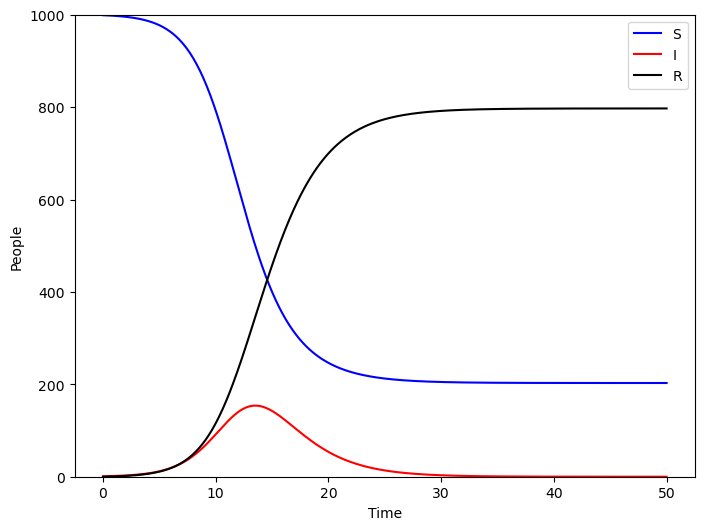

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(8, 6))  

plt.plot(t, y[:,0], label='S', color='blue')  # plot S
plt.plot(t, y[:,1], label='I', color='red')   # plot I
plt.plot(t, y[:,2], label='R', color='black')  # plot R

plt.legend()
plt.xlabel('Time')
plt.ylabel('People')
plt.ylim([0, 1000])

plt.show()

plt.savefig(f'Aldrich_SIR_beta_2_gamma_0.5.png') 

In [26]:
# forward euler 

def yourmom(S0, I0, R0, beta, gamma, t_final, dt):
    
    T = np.linspace(0, t_final, 500)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    
    S[0] = S0
    I[0] = I0
    R[0] = R0 
    
    N = S0 + I0 + R0 
    
    for i in range(len(T)):
        if i == 0:
            S[i] = S0
            I[i] = I0
            R[i] = R0
        
        else: 
            S[i] = S[i-1] + dt*(- beta*S[i-1]*I[i-1] / N) 
            I[i] = I[i-1] + dt*((beta*S[i-1]*I[i-1] / N) - gamma*I[i-1])
            R[i] = R[i-1] + dt*(gamma*I[i-1])
            
    return S, I, R, T



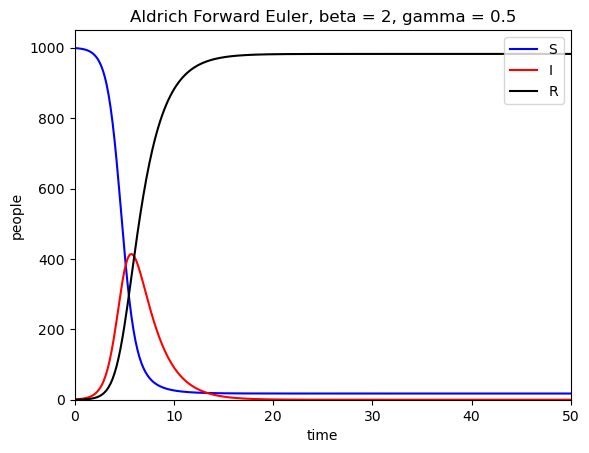

In [32]:
beta = 2
gamma = 0.5
max_time = 50 # days 
dt = 0.1

S0 = 999
I0 = 1
R0 = 0
N = S0 + I0 + R0

output = yourmom(S0, I0, R0, beta, gamma, max_time, dt)


fig,ax = plt.subplots()

ax.plot(output[3],output[0], c='blue', label='S')
ax.plot(output[3],output[1], c='red', label='I')
ax.plot(output[3],output[2], c='black', label='R')
ax.legend(loc = 'upper right')
ax.set_xlim([0, max_time])
ax.set_ylim( [0, 1.05*N])
ax.set_xlabel('time')
ax.set_ylabel('people')
plt.title(f'Aldrich Forward Euler, beta = {beta}, gamma = {gamma}')


plt.savefig(f'Aldrich_Forward_Euler_beta_{beta}_gamma_{gamma}.png') 

# Question 3: fsolve the final epidemic size equation 

Once R_0 > 1, there is a non-zero intersection between f(r_inf) and g(r_inf). This indicates that when R_0 < 1, at r_inf (at equilibrium), the entire population will have recovered. 

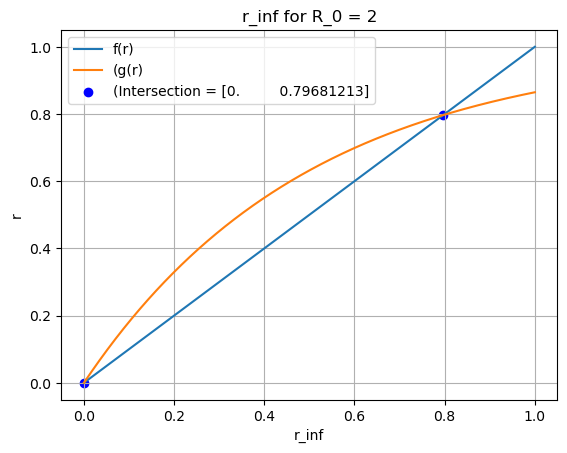

<Figure size 640x480 with 0 Axes>

In [115]:
def f(r):
    return r

def g(r, R_0):
    return 1 - np.exp(- R_0 * r)

# Difference
def difference(r=r_inf, R_0=R_0):
    return f(r) - g(r, R_0)

# intersection 
intersection = fsolve(difference, [0, 1])

r_inf = np.linspace(0, 1, 1000)
R_0 = 2
plt.plot(r_inf, f(r_inf), label='f(r)')
plt.plot(r_inf, g(r_inf, R_0), label=f'(g(r)')
plt.scatter(intersection, f(intersection), color='blue', label=f'(Intersection = {intersection}')


plt.xlabel('r_inf')
plt.ylabel('r')
plt.title(f'r_inf for R_0 = {R_0}')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig(f'Aldrich_r_inf_R0_{R_0}.png') 

Text(0.5, 1.0, 'Aldrich r_inf test prediction , beta = 1, gamma = 0.5')

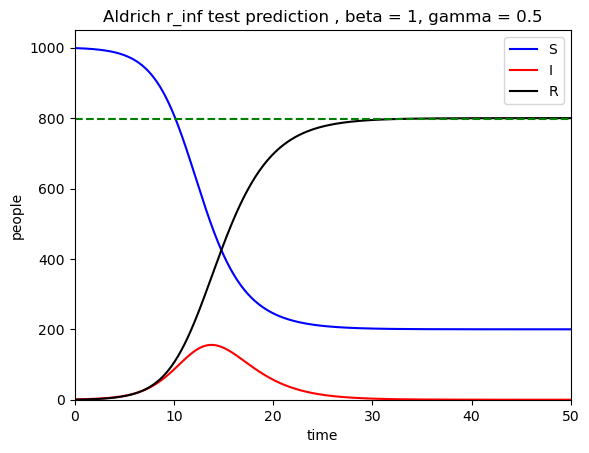

In [118]:
# Part D: test prediction with beta= 1 and gamma = 0.5: 



# USE SIR code 
beta = 1
gamma = 0.5
R_0 = beta / gamma 
#predicted_r_inf = fsolve(difference, [0, 1]) #find the intersection for given values of beta and gamma 
predicted_r_inf = intersection 


max_time = 50 # days 
dt = 0.1

S0 = 999
I0 = 1
R0 = 0
N = S0 + I0 + R0


output = yourmom(S0, I0, R0, beta, gamma, max_time, dt)


fig,ax = plt.subplots()

ax.plot(output[3],output[0], c='blue', label='S')
ax.plot(output[3],output[1], c='red', label='I')
ax.plot(output[3],output[2], c='black', label='R')
ax.legend(loc = 'upper right')
ax.set_xlim([0, max_time])
ax.set_ylim( [0, 1.05*N])
ax.set_xlabel('time')
ax.set_ylabel('people')
plt.axhline(y=(0.79681213*N), color='green', linestyle='--', label='root')
plt.title(f'Aldrich r_inf test prediction , beta = {beta}, gamma = {gamma}')



# Question 4

disease-free equilibrium is stable when s < 1/ R0 and unstable otherwise. Using N = 10^6, and ε = 1 / N as your perturbation, produce a single figure using your simulation code and its output that illustrates this point. Write a caption that explains the principle of stability, and explain how your figure illustrates it.

In [142]:
def yourmom_with_perturbation(S0, I0, R0, beta, gamma, t_final, dt):
    
    T = np.linspace(0, t_final, 500)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    epsilon = np.zeros(len(T))
    
    S[0] = S0
    I[0] = I0
    R[0] = R0 
    
    N = S0 + I0 + R0 
    epsilon[0] = 1 / N
    
    for i in range(len(T)):
        if i == 0:
            S[i] = S0
            I[i] = I0
            R[i] = R0
            epsilon[i] = epsilon[0]
        
        else: 
            S[i] = S[i-1] + dt*(- beta*S[i-1]*I[i-1] / N) 
            I[i] = I[i-1] + dt*((beta*S[i-1]*I[i-1] / N) - gamma*epsilon[i-1])
            R[i] = R[i-1] + dt*(gamma*I[i-1])
            epsilon[i] = epsilon[i - 1] + dt*(epsilon[i-1]*(beta*(S[i-1]/N) - gamma))
            
            
    s = S / N
    i = I / N
    r = R / N
    
    #rate = beta*s - gamma 
    #epsilon = np.exp(rate*T)
            
    return s, i, r, T, epsilon

In [69]:
# define the s_peak - everything to the left of this will have a value < 1 / R_0, everything to the right will have a value > 1 / R_0 

def s_peak(beta, gamma):
    return gamma / beta

Text(0, 0.5, 'people')

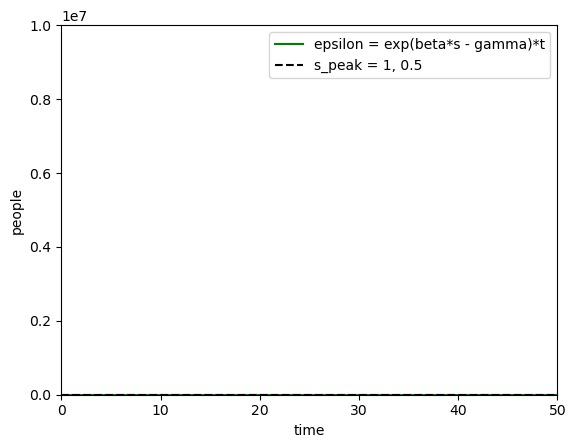

In [145]:
# let 1% of the initial population start in I
S0 = 10e6 - 10e4
I0 = 10e4
R0 = 0
N= S0 + I0 + R0

beta = 1
gamma = 0.5
max_time = 50 # days 
dt = 0.001

output = yourmom_with_perturbation(S0, I0, R0, beta, gamma, max_time, dt)

fig,ax = plt.subplots()

#ax.plot(output[3],output[0] , c='blue', label='s')
#ax.plot(output[3],output[1] , c='red', label='i')
#ax.plot(output[3],output[2] , c='black', label='r')

# epsilon over time 
ax.plot(output[3], output[4], c = 'green', label = 'epsilon = exp(beta*s - gamma)*t') 
plt.axhline(y=s_peak(beta, gamma), color='black', linestyle='--', label=f's_peak = {beta}, {gamma}')
ax.legend(loc = 'upper right')
ax.set_xlim([0 , max_time])
ax.set_ylim( [0, N])
ax.set_xlabel('time')
ax.set_ylabel('people')